This notebook will use the tidal ellipse calculating functions on simple cases.

In [1]:
import os
import datetime
import matplotlib.pylab as plt
from matplotlib.patches import Ellipse
import numpy as np
import seaborn as sns

import netCDF4 as nc
from salishsea_tools import (viz_tools, tidetools as tt)
from salishsea_tools.nowcast import research_VENUS

%matplotlib inline

###Simple Ellipse

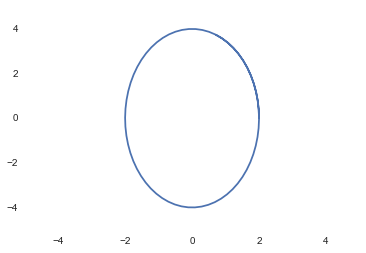

In [2]:
phi = 0
w1 = 2
w2 = 4

t = np.arange(0,15,.2)
plt.xlim(-5,5)
plt.ylim(-5,5)
u = w1*np.cos(tt.M2FREQ*t-phi)
v = w2*np.sin(tt.M2FREQ*t-phi)
plt.plot(u,v)

In [3]:
uM2amp, uM2pha, uK1amp, uK1pha = tt.fittit(u,t)
vM2amp, vM2pha, vK1amp, vK1pha = tt.fittit(v,t)
print uM2amp, uM2pha

1.99999999771 1.23276171049e-07


/home/mdunn/anaconda/lib/python2.7/site-packages/scipy/optimize/minpack.py:604: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


In [4]:
CX, SX, CY, SY, ap, am, ep, em, majora, minora, thetaa, phasea= tt.ellipse_params(uM2amp, uM2pha, vM2amp, vM2pha)

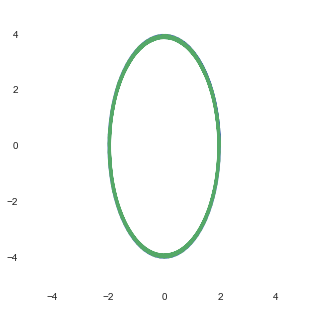

In [5]:
plt.figure(figsize=(5,5))
plt.plot(u,v)
plt.xlim(-5,5)
plt.ylim(-5,5)
t=np.arange(0,95)
plt.plot(CX*np.cos(tt.M2FREQ*t-phi)+SX*np.sin(tt.M2FREQ*t-phi),
         CY*np.cos(tt.M2FREQ*t-phi)+SY*np.sin(tt.M2FREQ*t-phi));

##Using loadparam_all
Let's look at Haro Strait for a long period of time to successfully seperate the harmonic constituents, however we cannot use velocity files from before November 26th 2014.

In [6]:
ih = 233
jh = 312
startdate = datetime.datetime(2014,11,26)
enddate = datetime.datetime(2015, 7, 10)
path = '/data/dlatorne/MEOPAR/SalishSea/nowcast/'

In [9]:
depth, maj, mino, the, pha, majk, mink, thek, phak= research_VENUS.loadparam_all(startdate, enddate, path, ih ,jh)

In [12]:
params = np.zeros((40,9))
for i in np.arange(0,39):
    params[i,:]=[depth[:][i], maj[:][i], mino[:][i], the[:][i], pha[:][i], majk[:][i], mink[:][i], thek[:][i], phak[:][i]]
print params[0,1]

0.872380916056


red is clockwise


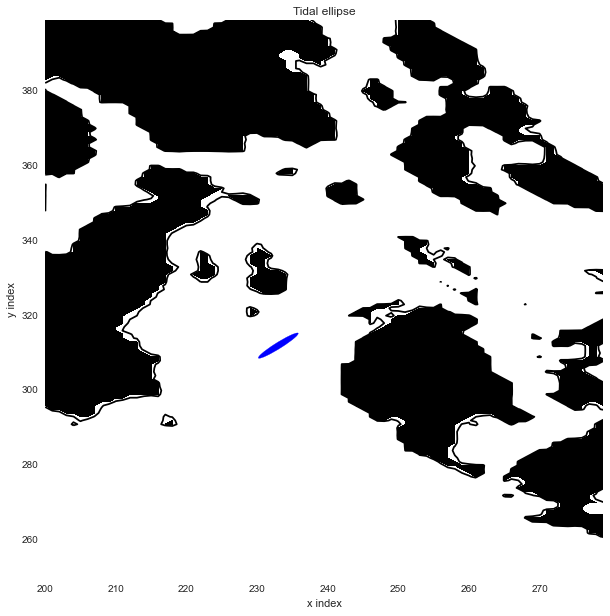

In [14]:
research_VENUS.plot_ellipses(params,ih,jh, depth=0, imin=200, imax = 280, jmin=250, jmax=400)